In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load and preprocess the dataset
fd = pd.read_csv('final-fd.csv')
print(fd.columns)

Index(['Age', 'Potential', 'Value', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'BallControl', 'SprintSpeed',
       'ShotPower', 'Penalties', 'BMI', 'Work Rate_NUM'],
      dtype='object')


In [ ]:
fd['BMI_floor'] = fd['BMI'].apply(np.floor)
fd['Value_of_log'] = np.log10(fd['Value'])


In [ ]:
# Drop the original BMI and Value columns
fd.drop(['BMI', 'Value'], axis=1, inplace=True)
print(fd.columns)

Index(['Age', 'Potential', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShotPower',
       'Penalties', 'Work Rate_NUM', 'BMI_floor', 'Value_of_log'],
      dtype='object')


In [ ]:
# Define the features and target variable
X = fd[['Age', 'Potential', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'BallControl', 'SprintSpeed', 'ShotPower',
       'Penalties', 'Work Rate_NUM', 'BMI_floor']]
y = fd['Value_of_log']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Create and train the SVR model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)


SVR()

In [ ]:
# Predict using the trained SVR model
y_pred = svr_model.predict(X_test_scaled)


In [ ]:
# Hyperparameter Tuning for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_svr = SVR(**best_params)
best_svr.fit(X_train_scaled, y_train)

SVR(C=10, gamma=0.01)

In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print the model summary
print("SVR Model Summary")
print("-------------------------------")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("-------------------------------")
print("Best Model Parameters:", best_params)


SVR Model Summary
-------------------------------
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10
R-squared (R²): 0.96
-------------------------------
Best Model Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


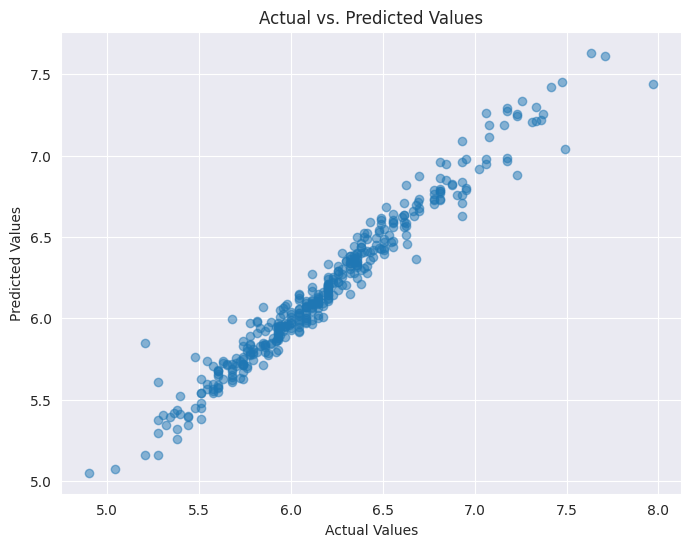

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()